In [82]:
# Importing necessary modules
import tensorflow as tf
import numpy as np

tf.__version__

'2.3.0'

In [83]:
# preparing training data
x_train = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_train = [[0], [0], [0], [1], [1], [1]]

In [84]:
# Initializing weights and biases
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# for cost plot
global cost_log
cost_log = np.array([]) # costs, weight, bias

In [85]:
# Hypothesis: Logistic regression H(x) = Wx + b
def logistic_regression(X):
  return tf.math.divide(1., 1. + tf.exp(tf.matmul(tf.cast(X, dtype=tf.float32), W) + b)) # sigmoid
  #return tf.nn.sigmoid(tf.matmul(tf.cast(X, dtype=tf.float32), W) + b) # Same as above

In [86]:
# Cost(loss) function: Cross entropy =  - Sum( y*log(H(x)) + (1-y) * log(1 - H(x)) ) / m
def cross_entropy(predicted, real):
  return -tf.reduce_mean(real * tf.math.log(predicted) + ( 1 - np.array(real)) * tf.math.log(1 - predicted))
  #return tf.reduce_mean(-tf.reduce_sum(real * tf.math.log(predicted))) # Same as above

In [87]:
# Optimizer: Gradient descent W = W - a(dy / dW), b = b - a(dy / db)
def gd(x, y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
  #print('loss', loss.numpy())
 
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)

  # for cost plot
  global cost_log
  cost_log = np.append(cost_log, np.array(loss.numpy()))

In [88]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    gd(x, y, learning_rate)

In [89]:
# train
train(x_train, y_train, 0.02, 5000)
print('Model H(x) = X * {} + {}'.format(W.numpy(), b.numpy()[0])) # W=2, b=0

Model H(x) = X * [[-1.5695478]
 [-0.4123647]] + 6.132604122161865


In [90]:
# check prediction and accuracy
hypothesis = logistic_regression(x_train)
pred = tf.cast(hypothesis>0.5, dtype=tf.int16)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, y_train), tf.float32))
print('Hypothesis:', hypothesis.numpy())
print('Prediction:', pred.numpy())
print('Accuracy: {}%'.format(accuracy.numpy()*100))

Hypothesis: [[0.02324089]
 [0.14723998]
 [0.26666757]
 [0.7994212 ]
 [0.9503687 ]
 [0.9838478 ]]
Prediction: [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]
Accuracy: 100.0%


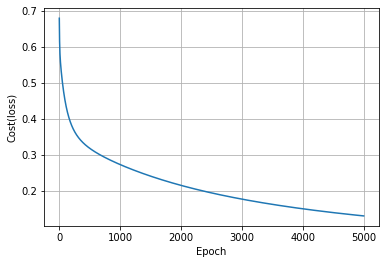

In [91]:
import matplotlib.pyplot as plt

# cost logs
plt.plot(range(len(cost_log)), cost_log)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Cost(loss)')
plt.show()